In [49]:
import Pkg
pkgs = [
    "PlotlyJS",
    "Primes",
    "DataFrames",
    "StatsBase",
    "Colors"
]

for pkg in pkgs
    try
        Pkg.add(pkg)
    catch
#         # tried to install an unregistered local package
    end
    eval(Meta.parse("import $pkg"))
end

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
  Installed Colors ─ v0.12.8
Updating `~/.julia/environments/v1.5/Project.toml`
  [5ae59095] + Colors v0.12.8
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [5ae59095] ↑ Colors v0.12.6 ⇒ v0.12.8


<!-- ![](../assets/images/IMG_2027.jpeg) -->
<img src="../assets/images/IMG_2027.jpeg" width="500"/>

In [135]:
results = DataFrames.DataFrame(
    error_rate = [],
    genome_length = [],
    assembler = [],
    ks = [],
    accuracies = [])

min_k = 7
max_k = 63
assemblers = [
    "Flye",
    "Ra",
    "Canu",
    "Spades",
    "Velvet",
    "Megahit",
    "Viterbi"
]
@time for k in Primes.primes(min_k, 17)
    for error_rate in [0, 0.001, 0.01, 0.1]
        for genome_length in Int.([1e3, 1e4, 1e5, 1e6])
            for assembler in assemblers
                ks = Primes.primes(k, max_k)
                accuracies = sort(StatsBase.sample(0.5:0.001:1.0, length(ks)))
                row = (
                    error_rate = error_rate,
                    genome_length = genome_length,
                    assembler = assembler,
                    ks = ks,
                    accuracies = accuracies
                )
                push!(results, row)
            end
        end
    end
end
results;

  0.001286 seconds (8.96 k allocations: 636.141 KiB)


In [136]:
# arrow-bar-down
# arrow-bar-down-open
# arrow-bar-left
# arrow-bar-left-open
# arrow-bar-right
# arrow-bar-right-open
# arrow-bar-up
# arrow-bar-up-open
# arrow-down
# arrow-down-open
# arrow-left
# arrow-left-open
# arrow-right
# arrow-right-open
# arrow-up
# arrow-up-open
# asterisk
# asterisk-open
# bowtie
# bowtie-open
# circle
# circle-cross
# circle-cross-open
# circle-dot
# circle-open
# circle-open-dot
# circle-x
# circle-x-open
# cross
# cross-dot
# cross-open
# cross-open-dot
# cross-thin
# cross-thin-open
# diamond
# diamond-cross
# diamond-cross-open
# diamond-dot
# diamond-open
# diamond-open-dot
# diamond-tall
# diamond-tall-dot
# diamond-tall-open
# diamond-tall-open-dot
# diamond-wide
# diamond-wide-dot
# diamond-wide-open
# diamond-wide-open-dot
# diamond-x
# diamond-x-open
# hash
# hash-dot
# hash-open
# hash-open-dot
# hexagon
# hexagon-dot
# hexagon-open
# hexagon-open-dot
# hexagon2
# hexagon2-dot
# hexagon2-open
# hexagon2-open-dot
# hexagram
# hexagram-dot
# hexagram-open
# hexagram-open-dot
# hourglass
# hourglass-open
# line-ew
# line-ew-open
# line-ne
# line-ne-open
# line-ns
# line-ns-open
# line-nw
# line-nw-open
# octagon
# octagon-dot
# octagon-open
# octagon-open-dot
# pentagon
# pentagon-dot
# pentagon-open
# pentagon-open-dot
# square
# square-cross
# square-cross-open
# square-dot
# square-open
# square-open-dot
# square-x
# square-x-open
# star
# star-diamond
# star-diamond-dot
# star-diamond-open
# star-diamond-open-dot
# star-dot
# star-open
# star-open-dot
# star-square
# star-square-dot
# star-square-open
# star-square-open-dot
# star-triangle-down
# star-triangle-down-dot
# star-triangle-down-open
# star-triangle-down-open-dot
# star-triangle-up
# star-triangle-up-dot
# star-triangle-up-open
# star-triangle-up-open-dot
# triangle-down
# triangle-down-dot
# triangle-down-open
# triangle-down-open-dot
# triangle-left
# triangle-left-dot
# triangle-left-open
# triangle-left-open-dot
# triangle-ne
# triangle-ne-dot
# triangle-ne-open
# triangle-ne-open-dot
# triangle-nw
# triangle-nw-dot
# triangle-nw-open
# triangle-nw-open-dot
# triangle-right
# triangle-right-dot
# triangle-right-open
# triangle-right-open-dot
# triangle-se
# triangle-se-dot
# triangle-se-open
# triangle-se-open-dot
# triangle-sw
# triangle-sw-dot
# triangle-sw-open
# triangle-sw-open-dot
# triangle-up
# triangle-up-dot
# triangle-up-open
# triangle-up-open-dot
# x
# x-dot
# x-open
# x-open-dot
# x-thin
# x-thin-open
# y-down
# y-down-open
# y-left
# y-left-open
# y-right
# y-right-open
# y-up
# y-up-open

In [143]:
assembler_colors = Colors.distinguishable_colors(length(unique(results[!, "assembler"])), [Colors.RGB(1,1,1), Colors.RGB(0,0,0)], dropseed=true)
shapes = [
    "x-dot-open",
    "triangle-up-open",
    "star-open",
    "octagon-open"
]
dashes = [
    "dot",
    "dash",
    "dashdot",
    "solid"
]
legend_entries = Set()
plots = PlotlyJS.SyncPlot[]
for g1 in DataFrames.groupby(results, "error_rate")
    for g2 in DataFrames.groupby(g1, "ks")
        traces = []
        for (color, g3) in zip(assembler_colors, DataFrames.groupby(g2, "assembler"))
            for ((shape, dash), g4) in zip(zip(shapes, dashes), DataFrames.groupby(g3, "genome_length"))
                for row_i in 1:size(g4, 1)
                    name = 
                    """
                    assembler: $(string(g4[1, "assembler"]))<br>
                    genome_size: $(string(g4[1, "genome_length"]))
                    """
#                     string(g4[1, "assembler"]) * "-" * string(g4[1, "genome_length"])
                    showlegend = name in legend_entries ? false : true
                    if showlegend
                        push!(legend_entries, name)
                    end
                    x = g4[row_i, :ks]
                    y = g4[row_i, :accuracies]
                    trace = PlotlyJS.scatter(;
                        x=g4[row_i, :ks],
                        y=g4[row_i, :accuracies],
                        mode="lines+markers",
                        marker=PlotlyJS.attr(color=color, symbol=shape),
                        line=PlotlyJS.attr(dash=dash, symbol=shape),
                        name=name,
                        showlegend=showlegend,
                        legend=PlotlyJS.attr(title="legend title")
                    )
                    push!(traces, trace)
                end
            end
        end
        traces = [traces...]
        title = 
        """
        error_rate = $(g2[1, "error_rate"])<br>
        starting_k = $(g2[1, "ks"][1])
        """
        layout = PlotlyJS.Layout(
            title=title,
            xaxis=PlotlyJS.attr(title="kmer length", range=[0, 64]),
            yaxis=PlotlyJS.attr(title="accuracy", range=[0, 1])
        )
        plot = PlotlyJS.plot(traces, layout)
        push!(plots, plot)
    end
end

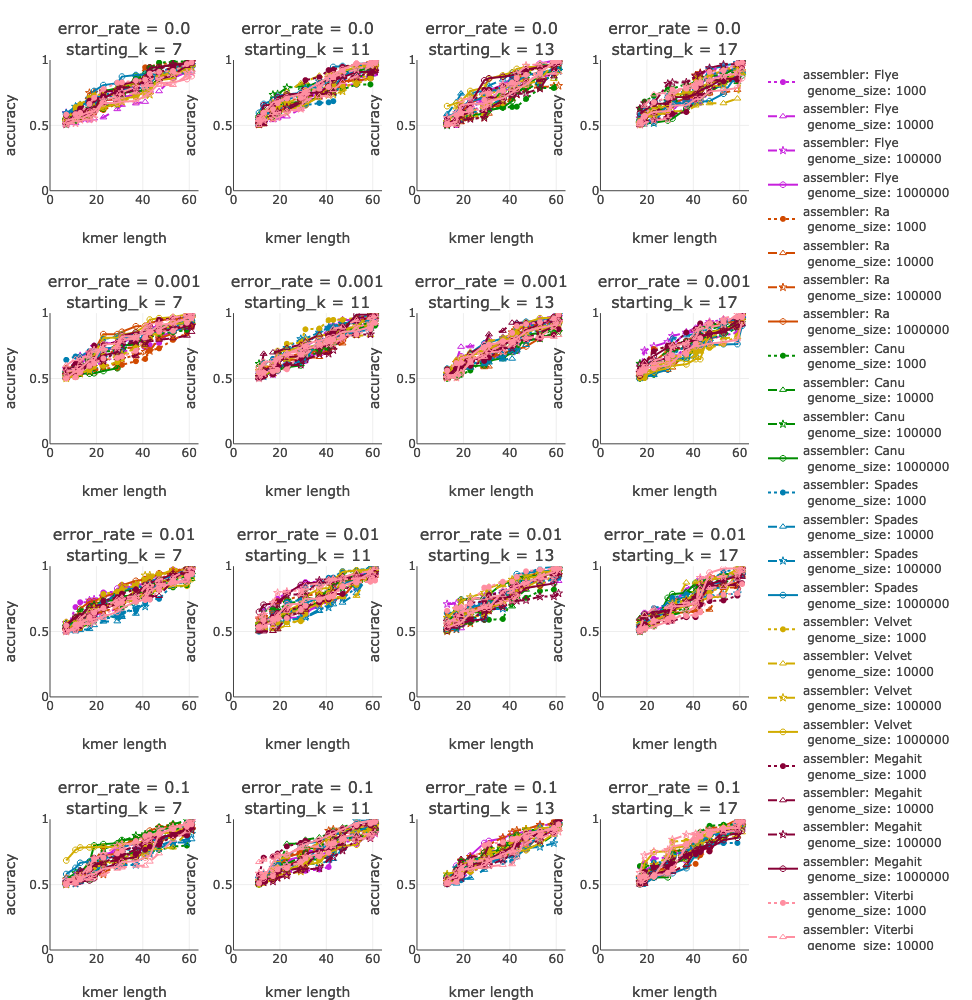

In [146]:
x = [
    plots[1] plots[2] plots[3] plots[4]
    plots[5] plots[6] plots[7] plots[8]
    plots[9] plots[10] plots[11] plots[12]
    plots[13] plots[14] plots[15] plots[16]
];
PlotlyJS.relayout!(x, height=1000, width=1000);
x

<!-- ![](../assets/images/IMG_2028.jpeg) -->
<img src="../assets/images/IMG_2028.jpeg" width="500"/>

In [175]:
results = DataFrames.DataFrame(
    error_rate = [],
    genome_length = [],
    assembler = [],
    ks = [],
    memory = [],
    runtime = [])

min_k = 7
max_k = 63
assemblers = [
    "Flye",
    "Ra",
    "Canu",
    "Spades",
    "Velvet",
    "Megahit",
    "Viterbi"
]
@time for k in Primes.primes(min_k, 17)
    for error_rate in [0, 0.001, 0.01, 0.1]
        for genome_length in Int.([1e3, 1e4, 1e5, 1e6])
            for assembler in assemblers
                ks = Primes.primes(k, max_k)
                memory = sqrt.(ks .* genome_length).^(1+rand())
#                 memory = sqrt(genome_length)^(1+rand())
#                 runtime = sqrt(genome_length)^(1+rand())
                runtime = (ks .* genome_length).^(1+rand())
                row = (
                    error_rate = error_rate,
                    genome_length = genome_length,
                    assembler = assembler,
                    ks = ks,
                    memory = memory,
                    runtime = runtime
                )
                push!(results, row)
            end
        end
    end
end
results;

  0.189213 seconds (475.68 k allocations: 25.090 MiB)


In [176]:
# arrow-bar-down
# arrow-bar-down-open
# arrow-bar-left
# arrow-bar-left-open
# arrow-bar-right
# arrow-bar-right-open
# arrow-bar-up
# arrow-bar-up-open
# arrow-down
# arrow-down-open
# arrow-left
# arrow-left-open
# arrow-right
# arrow-right-open
# arrow-up
# arrow-up-open
# asterisk
# asterisk-open
# bowtie
# bowtie-open
# circle
# circle-cross
# circle-cross-open
# circle-dot
# circle-open
# circle-open-dot
# circle-x
# circle-x-open
# cross
# cross-dot
# cross-open
# cross-open-dot
# cross-thin
# cross-thin-open
# diamond
# diamond-cross
# diamond-cross-open
# diamond-dot
# diamond-open
# diamond-open-dot
# diamond-tall
# diamond-tall-dot
# diamond-tall-open
# diamond-tall-open-dot
# diamond-wide
# diamond-wide-dot
# diamond-wide-open
# diamond-wide-open-dot
# diamond-x
# diamond-x-open
# hash
# hash-dot
# hash-open
# hash-open-dot
# hexagon
# hexagon-dot
# hexagon-open
# hexagon-open-dot
# hexagon2
# hexagon2-dot
# hexagon2-open
# hexagon2-open-dot
# hexagram
# hexagram-dot
# hexagram-open
# hexagram-open-dot
# hourglass
# hourglass-open
# line-ew
# line-ew-open
# line-ne
# line-ne-open
# line-ns
# line-ns-open
# line-nw
# line-nw-open
# octagon
# octagon-dot
# octagon-open
# octagon-open-dot
# pentagon
# pentagon-dot
# pentagon-open
# pentagon-open-dot
# square
# square-cross
# square-cross-open
# square-dot
# square-open
# square-open-dot
# square-x
# square-x-open
# star
# star-diamond
# star-diamond-dot
# star-diamond-open
# star-diamond-open-dot
# star-dot
# star-open
# star-open-dot
# star-square
# star-square-dot
# star-square-open
# star-square-open-dot
# star-triangle-down
# star-triangle-down-dot
# star-triangle-down-open
# star-triangle-down-open-dot
# star-triangle-up
# star-triangle-up-dot
# star-triangle-up-open
# star-triangle-up-open-dot
# triangle-down
# triangle-down-dot
# triangle-down-open
# triangle-down-open-dot
# triangle-left
# triangle-left-dot
# triangle-left-open
# triangle-left-open-dot
# triangle-ne
# triangle-ne-dot
# triangle-ne-open
# triangle-ne-open-dot
# triangle-nw
# triangle-nw-dot
# triangle-nw-open
# triangle-nw-open-dot
# triangle-right
# triangle-right-dot
# triangle-right-open
# triangle-right-open-dot
# triangle-se
# triangle-se-dot
# triangle-se-open
# triangle-se-open-dot
# triangle-sw
# triangle-sw-dot
# triangle-sw-open
# triangle-sw-open-dot
# triangle-up
# triangle-up-dot
# triangle-up-open
# triangle-up-open-dot
# x
# x-dot
# x-open
# x-open-dot
# x-thin
# x-thin-open
# y-down
# y-down-open
# y-left
# y-left-open
# y-right
# y-right-open
# y-up
# y-up-open

In [179]:
Y_variable = "memory"
assembler_colors = Colors.distinguishable_colors(length(unique(results[!, "assembler"])), [Colors.RGB(1,1,1), Colors.RGB(0,0,0)], dropseed=true)
shapes = [
    "x-dot-open",
    "triangle-up-open",
    "star-open",
    "octagon-open"
]
dashes = [
    "dot",
    "dash",
    "dashdot",
    "solid"
]
legend_entries = Set()
plots = PlotlyJS.SyncPlot[]
for g1 in DataFrames.groupby(results, "error_rate")
    for g2 in DataFrames.groupby(g1, "ks")
        traces = []
        for (color, g3) in zip(assembler_colors, DataFrames.groupby(g2, "assembler"))
            for ((shape, dash), g4) in zip(zip(shapes, dashes), DataFrames.groupby(g3, "genome_length"))
                for row_i in 1:size(g4, 1)
                    name = 
                    """
                    assembler: $(string(g4[1, "assembler"]))<br>
                    genome_size: $(string(g4[1, "genome_length"]))
                    """
#                     string(g4[1, "assembler"]) * "-" * string(g4[1, "genome_length"])
                    showlegend = name in legend_entries ? false : true
                    if showlegend
                        push!(legend_entries, name)
                    end
                    trace = PlotlyJS.scatter(;
                        x=g4[row_i, :ks],
                        y=g4[row_i, Y_variable],
                        mode="lines+markers",
                        marker=PlotlyJS.attr(color=color, symbol=shape),
                        line=PlotlyJS.attr(dash=dash, symbol=shape),
                        name=name,
                        showlegend=showlegend,
#                         legend=PlotlyJS.attr(title="legend title")
                    )
                    push!(traces, trace)
                end
            end
        end
        traces = [traces...]
        title = 
        """
        error_rate = $(g2[1, "error_rate"])<br>
        starting_k = $(g2[1, "ks"][1])
        """
        xmax = maximum(reduce(vcat, results[!, "ks"]))
        ymax = maximum(reduce(vcat, results[!, Y_variable]))
        layout = PlotlyJS.Layout(
            title=title,
            xaxis=PlotlyJS.attr(title="kmer length", range=[0, xmax]),
            yaxis=PlotlyJS.attr(title=Y_variable, range=[0, ymax])
        )
        plot = PlotlyJS.plot(traces, layout)
        push!(plots, plot)
    end
end

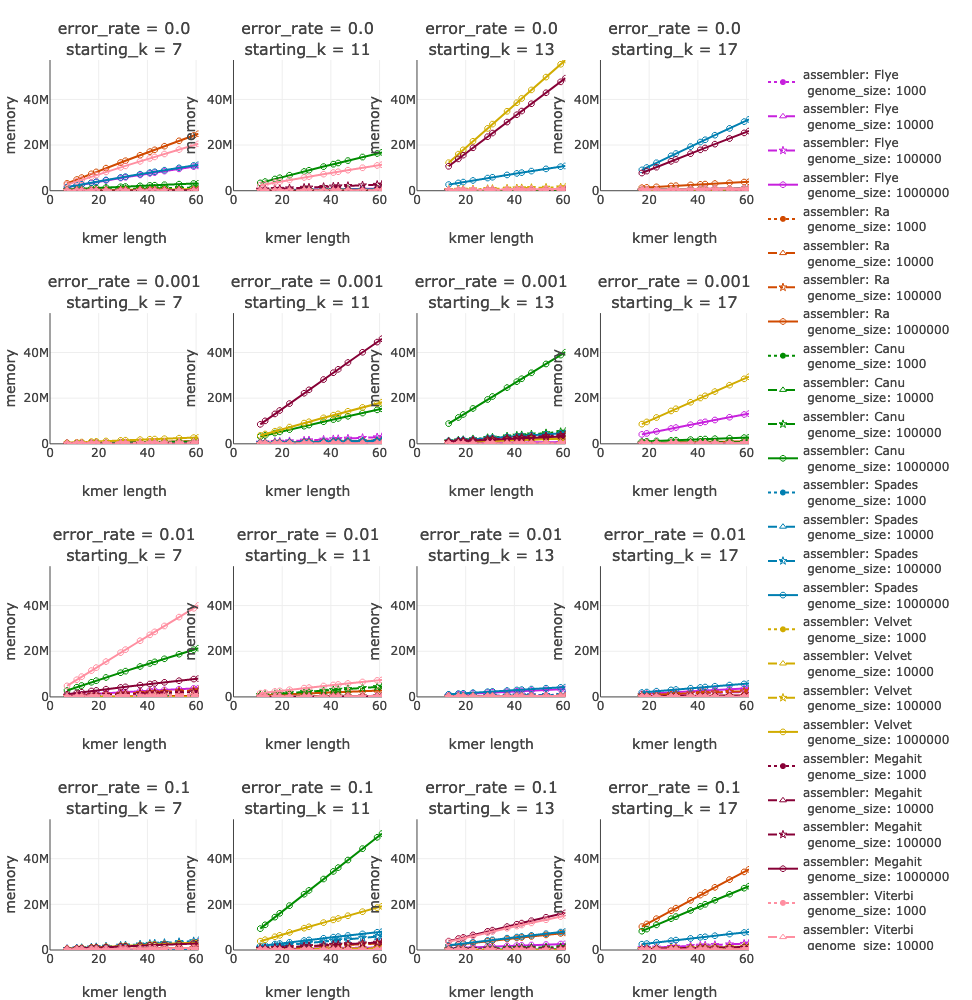

In [180]:
x = [
    plots[1] plots[2] plots[3] plots[4]
    plots[5] plots[6] plots[7] plots[8]
    plots[9] plots[10] plots[11] plots[12]
    plots[13] plots[14] plots[15] plots[16]
];
PlotlyJS.relayout!(x, height=1000, width=1000);
x

In [181]:
Y_variable = "runtime"
assembler_colors = Colors.distinguishable_colors(length(unique(results[!, "assembler"])), [Colors.RGB(1,1,1), Colors.RGB(0,0,0)], dropseed=true)
shapes = [
    "x-dot-open",
    "triangle-up-open",
    "star-open",
    "octagon-open"
]
dashes = [
    "dot",
    "dash",
    "dashdot",
    "solid"
]
legend_entries = Set()
plots = PlotlyJS.SyncPlot[]
for g1 in DataFrames.groupby(results, "error_rate")
    for g2 in DataFrames.groupby(g1, "ks")
        traces = []
        for (color, g3) in zip(assembler_colors, DataFrames.groupby(g2, "assembler"))
            for ((shape, dash), g4) in zip(zip(shapes, dashes), DataFrames.groupby(g3, "genome_length"))
                for row_i in 1:size(g4, 1)
                    name = 
                    """
                    assembler: $(string(g4[1, "assembler"]))<br>
                    genome_size: $(string(g4[1, "genome_length"]))
                    """
#                     string(g4[1, "assembler"]) * "-" * string(g4[1, "genome_length"])
                    showlegend = name in legend_entries ? false : true
                    if showlegend
                        push!(legend_entries, name)
                    end
                    trace = PlotlyJS.scatter(;
                        x=g4[row_i, :ks],
                        y=g4[row_i, Y_variable],
                        mode="lines+markers",
                        marker=PlotlyJS.attr(color=color, symbol=shape),
                        line=PlotlyJS.attr(dash=dash, symbol=shape),
                        name=name,
                        showlegend=showlegend,
#                         legend=PlotlyJS.attr(title="legend title")
                    )
                    push!(traces, trace)
                end
            end
        end
        traces = [traces...]
        title = 
        """
        error_rate = $(g2[1, "error_rate"])<br>
        starting_k = $(g2[1, "ks"][1])
        """
        xmax = maximum(reduce(vcat, results[!, "ks"]))
        ymax = maximum(reduce(vcat, results[!, Y_variable]))
        layout = PlotlyJS.Layout(
            title=title,
            xaxis=PlotlyJS.attr(title="kmer length", range=[0, xmax]),
            yaxis=PlotlyJS.attr(title=Y_variable, range=[0, ymax])
        )
        plot = PlotlyJS.plot(traces, layout)
        push!(plots, plot)
    end
end

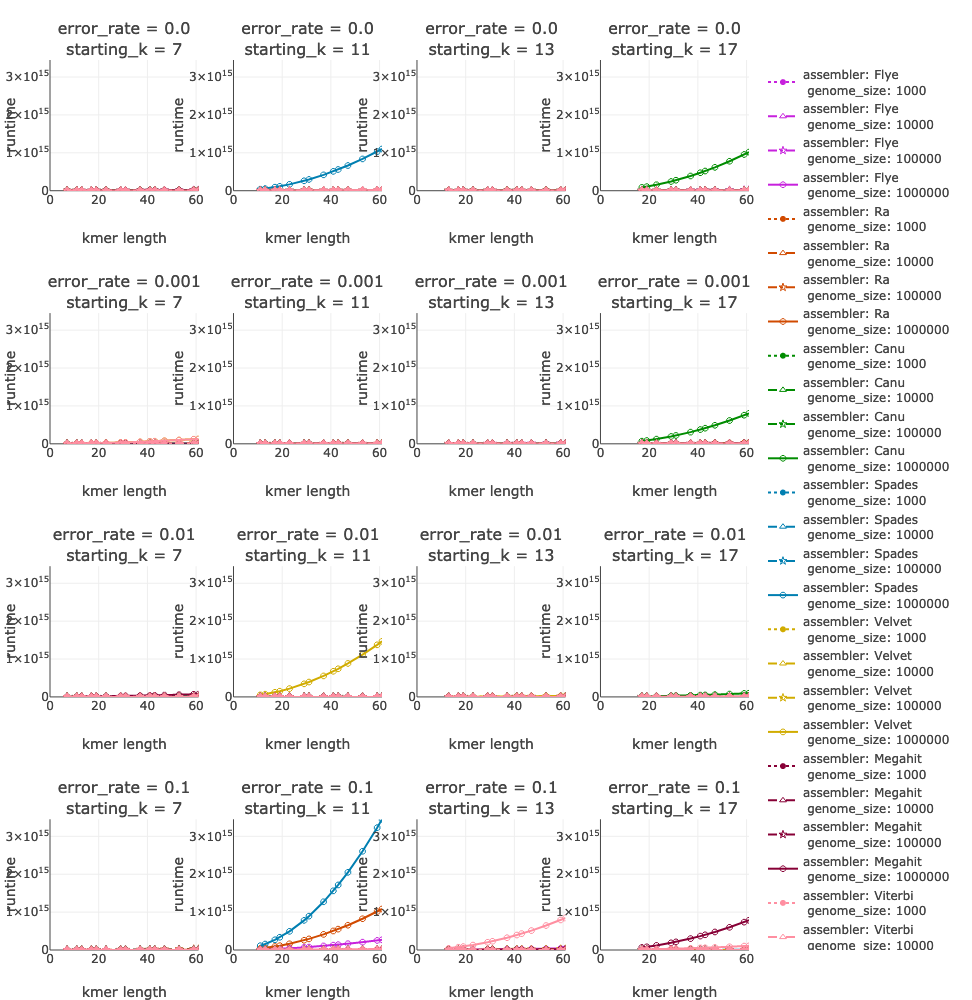

In [182]:
x = [
    plots[1] plots[2] plots[3] plots[4]
    plots[5] plots[6] plots[7] plots[8]
    plots[9] plots[10] plots[11] plots[12]
    plots[13] plots[14] plots[15] plots[16]
];
PlotlyJS.relayout!(x, height=1000, width=1000);
x